# Introduction to pandapower 

pandapower is an open‑source Python library for power system modelling and analysis. It stores information about a network and provides the functionality for running power-flow calculations, plotting, geospatial interpretability and saving that data. As the name suggests it is built on pandas with the network and power-flow results being stored within pandas dataframes.

This is a very scaled down introduction to *pandapower* where we load in a JSON file using *pandapower* and use our previous knowledge of Pandas to explore and plot the data.

You can access good 'Getting Started' examples and the documentation via the [pandapower website](https://www.pandapower.org/start/)

### Import libraries

In [273]:
# Import Pandas and pandapower below. Be sure to import them correctly
import pandapower as pp

## Networks
In pandapower, the Network object is the central container for a power system model. It stores network elements (buses, lines, loads, generators, switches, - more on this next week) as pandas DataFrames and holds power-flow results in matching res_ DataFrames after you run a power flow.

Networks can be built from scratch using the pandapower.create_* functions, but for ease, lets import a pre-made one.

### 1. Import the example network saved in 'ThreeBusPlot23.json'. Be sure to add the right path for your file!

In [298]:
# Use padapower to load a the file called "ThreeBusPlot25.json" and assign to a variable called 'net'
net = pp.from_json('..\\Data\\ThreeBusPlot25.json')

### 2. Executing simply net will provide you with some details of what is contained within the network.

In [275]:
# calling the network object provides some details of its structure
net

This pandapower network includes the following parameter tables:
   - bus (3 elements)
   - load (2 elements)
   - ext_grid (1 element)
   - line (3 elements)

### 3. Print the object type of the 'line' attribute of 'net'.


In [276]:
# print the object type of the line attribute of net
print(type(net.line))


<class 'pandas.core.frame.DataFrame'>


As you can see, under the hood, pandapower uses Dataframes. 

**Call net.line to view the dataframe and its contents.**

In [277]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.0200,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.0125,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.0100,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


### 4. Now run a power flow on the network using the pandapower.runpp function

In [278]:
# run a power flow on the network using the pandapower runpp function 
pp.runpp(net)
print(net.res_line) 

   p_from_mw  q_from_mvar  p_to_mw  q_to_mvar  pl_mw  ql_mvar  i_from_ka  \
0      199.5         84.0   -191.0      -67.0    8.5     17.0   0.541017   
1      -65.6        -43.2     66.4       44.8    0.8      1.6   0.209946   
2     -205.0        -90.0    210.0      105.0    5.0     15.0   0.586816   

    i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  va_to_degree  \
0  0.541017  0.541017    1.050000        0.000000  0.981835     -3.503532   
1  0.209946  0.209946    0.981835       -3.503532  1.001249     -2.862405   
2  0.586816  0.586816    1.001249       -2.862405  1.050000      0.000000   

   loading_percent  
0         0.054102  
1         0.020995  
2         0.058682  


### 5. Explore the underlying data that contains the power flow results

In [279]:
# Set some Dataframe variables up (called: 'df1', 'df2' and 'df3') so that they can be respectively 
# assigned to the 'line' and 'res_line'
df1 = net.line
df2 = net.res_line

In [280]:
# explore the contents of the dataframes
df1.head()


,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.0200,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.0125,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.0100,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


In [281]:
# In df1, change the value of 'r_ohm_per_km' from 0.0125 to 0.07. This must be done in only one line.
# Once done, check to see if the change has been made.
df1.at[1, 'r_ohm_per_km'] = 0.07
df1.head()

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.02,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.07,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.01,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


In [282]:
# Show that the change in 'df1' ALSO changes 'net.line' - Why would this happen?
net.line.head()
# net.line.head() was assigned to df1, so any changes to df1 will reflect in net.line as they reference the same DataFrame object.

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,geo
0,None,None,0,1,484.0,0.02,0.040,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.2763, 51.7503], [-1.189, 5..."
1,None,None,1,2,484.0,0.07,0.025,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.189, 51.7236], [-1.3269, 5..."
2,None,None,2,0,484.0,0.01,0.030,1.000000e-09,0.0,1000.0,1.0,1,None,True,"{""coordinates"":[[-1.3269, 51.6312], [-1.2763, ..."


### 6. Rerun the power flow on the updated network. Does anything change in the net.res_line?

In [283]:
# Rerun the power flow on the updated network. Does anything change in the net.res_line?
pp.runpp(net)
net.res_line


,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,208.073272,120.117834,-197.602019,-99.175328,10.471253,20.942505,0.600483,0.600483,0.600483,1.050000,0.000000,0.966254,-3.345434,0.060048
1,-58.997981,-11.024672,61.698800,11.989250,2.700819,0.964578,0.163010,0.163010,0.163010,0.966254,-3.345434,1.011874,-2.933335,0.016301
2,-200.298800,-57.189250,204.536586,69.902608,4.237786,12.713358,0.540239,0.540239,0.540239,1.011874,-2.933335,1.050000,0.000000,0.054024


## Plotting

### 7. From the pandapower.plotting module, import the simple_plotting convenience function and use it to plot the network.

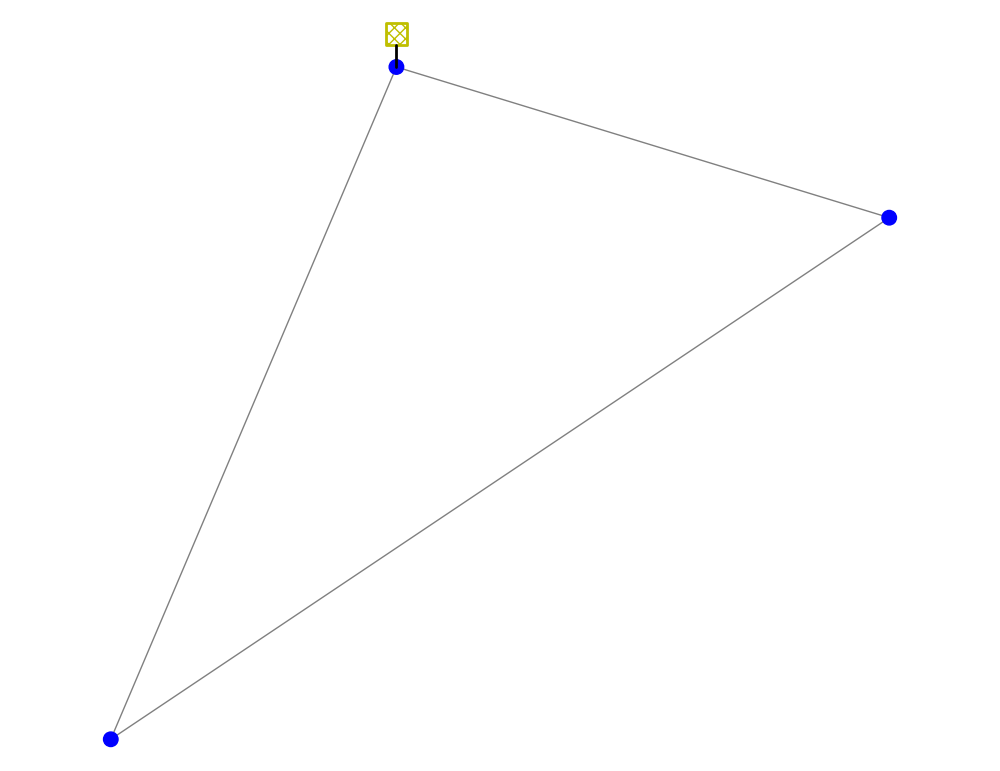

<Axes: >

In [284]:
# plot the network using the pandapower convenience function
from pandapower import plotting
from pandapower.plotting import simple_plot
simple_plot(net)

The number of given colors (1) is smaller than the number of nodes (3) to draw! The colors will be repeated to fit.


<Axes: >

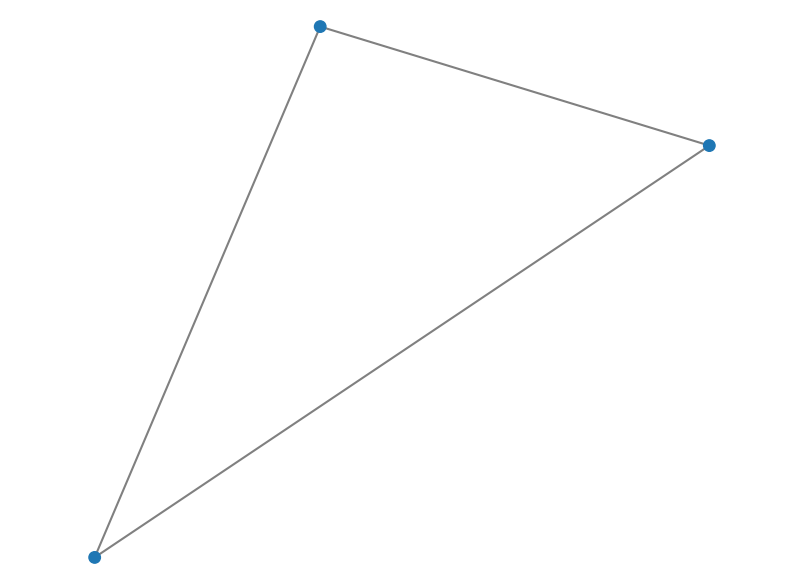

In [285]:
# use collections to plot a colourmap showing line loadings
import matplotlib.pyplot as plt
import pandapower as pp
import pandapower.plotting as plot
%matplotlib inline


sizes = plot.get_collection_sizes(net)

lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=sizes['bus'], color=colors[0], zorder=2) #create buses
plot.draw_collections([lc, bc], figsize=(8,6)) # plot lines and buses

For more examples of basic plotting, take a look at the basic [plotting tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_basic.ipynb).

### 8. With reference to [pandapower colormap tutorial](https://github.com/e2nIEE/pandapower/blob/master/tutorials/plotting_colormaps.ipynb), trying plotting a color map highlighting the line loadings for the 3 bus network. Check the lines dataframe to identify a color ranges that will highlight the different line loadings for this particular network loading.

<Axes: >

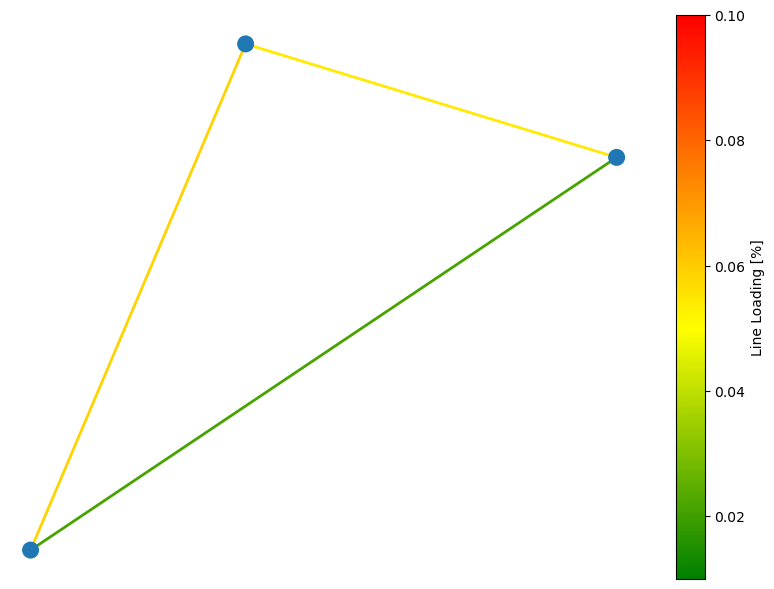

In [313]:
# use collections to plot a colourmap showing line loadings
import pandapower as pp
import pandapower.plotting as plot
%matplotlib inline


pp.runpp(net)
cmap_list=[(0.01, "green"), (0.05, "yellow"), (0.1, "red")] # line loading in %  
cmap, norm = plot.cmap_continuous(cmap_list) # create colormap and normalization

lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2) # create lines  
bc = plot.create_bus_collection(net, net.bus.index, size=0.002, zorder=2) # create buses
plot.draw_collections([lc, bc], figsize=(8,6))



<Axes: >

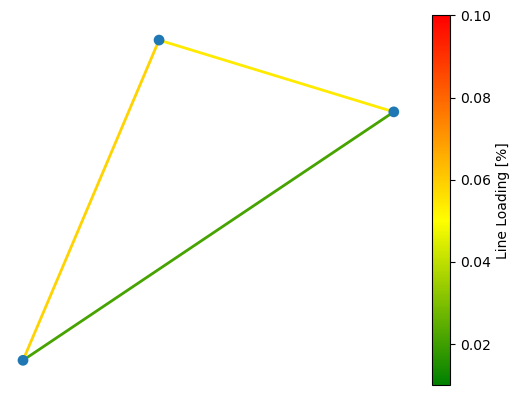

In [319]:
# plot the same figure on a matplotlib figure making use of the ax keyword within the draw_collections function.
import matplotlib.pyplot as pp_plt
fig, ax = pp_plt.subplots()

plot.draw_collections([lc, bc], ax=ax, figsize=(8,6))

### 9. Try adding a basemap to your plot. There are many ways in which you could do this, one library that makes this particularly helpful is contextily. Use the contextily.add_basemap function to add a basemap to your previous plot.

Note: The coordinates within the network is gcs epsg:4326, e.g. lat long

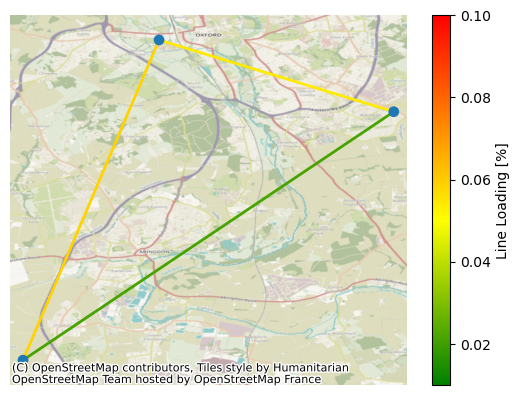

In [324]:
# add a basemap to your plot
import contextily as cx
fig, ax = pp_plt.subplots()
plot.draw_collections([lc, bc], ax=ax, figsize=(8,6))
cx.add_basemap(ax, crs="EPSG:4326")

For more geospatial analysis options, you might want to convert your pandapower dataframes into a geopandas dataframe.

### 10. Create a GeoDataFrame from the bus and bus_geodata dataframes. Your GDF should have a 'geometry' column containing Point objects and have a crs assigned.

In [ ]:
# create a GeoDataFrame

import geopandas as gpd

bus_geojson = plot.geo.dump_to_geojson(net, nodes=True)
bus_gdf = gpd.GeoDataFrame.from_features(bus_geojson["features"], crs="EPSG:4326")
lines_geojson = plot.geo.dump_to_geojson(net, branches=True)
lines_gdf = gpd.GeoDataFrame.from_features(lines_geojson["features"], crs="EPSG:4326")

bus_gdf =bus_gdf.to_crs(epsg=27700)
lines_gdf= lines_gdf.to_crs(epsg=27700)

ax =bus_gdf.plot()
lines_gdf.plot(ax=ax)

## Timeseries
So far, the power flow has been solved for a single timestamp. How might you go about solving for a timeseries of load and generation?

### 11. Write some pseudo code for a general structure of how you could achieve it.

PandaPower has some built in functions that simplify this for you. Take a look at the [timeseries tutorial](https://github.com/e2nIEE/pandapower/blob/develop/tutorials/time_series.ipynb) if you want more information.